In [4]:
pip install pandas


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: C:\Users\CRAIA-AREA EDUCATORI\Documents\Università\interprete\Scripts\python.exe -m pip install --upgrade pip



  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/29/d4/1244ab8edf173a10fd601f7e13b9566c1b525c4f365d6bee918e68381889/pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for numpy>=1.26.0 from https://files.pythonhosted.org/packages/4c/79/73735a6a5dad6059c085f240a4e74c9270feccd2bc66e4d31b5ca01d329c/numpy-2.1.2-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     ------ --------------------------------- 10.2/59.7 kB ? eta -:--:--
     -------------------------- ----------- 41.0/59.7 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 59.7/59.7 kB 634.7 kB/s eta 0:00:00
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/11/c3/005fcca25ce078d2cc29fd559379817424e94885510568bc1bc53d7d5846/pytz-2024.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tzdata>=2022.7 from https://fil

In [5]:
import pandas as pd

In [8]:
df = pd.read_csv('C:\\Users\\CRAIA-AREA EDUCATORI\\Documents\\Università\\Sistemi intelligenti per internet\\beer_data\\beer_reviews.csv')

#visualizzo le prime righe per controllare la struttura 

In [11]:
print(df.head())

   brewery_id             brewery_name  review_time  review_overall  \
0       10325          Vecchio Birraio   1234817823             1.5   
1       10325          Vecchio Birraio   1235915097             3.0   
2       10325          Vecchio Birraio   1235916604             3.0   
3       10325          Vecchio Birraio   1234725145             3.0   
4        1075  Caldera Brewing Company   1293735206             4.0   

   review_aroma  review_appearance review_profilename  \
0           2.0                2.5            stcules   
1           2.5                3.0            stcules   
2           2.5                3.0            stcules   
3           3.0                3.5            stcules   
4           4.5                4.0     johnmichaelsen   

                       beer_style  review_palate  review_taste  \
0                      Hefeweizen            1.5           1.5   
1              English Strong Ale            3.0           3.0   
2          Foreign / Export Stou

In [18]:
import re

In [21]:
pip install nltk


  Obtaining dependency information for nltk from https://files.pythonhosted.org/packages/4d/66/7d9e26593edda06e8cb531874633f7c2372279c3b0f46235539fe546df8b/nltk-3.9.1-py3-none-any.whl.metadata
  Obtaining dependency information for click from https://files.pythonhosted.org/packages/00/2e/d53fa4befbf2cfa713304affc7ca780ce4fc1fd8710527771b58311a3229/click-8.1.7-py3-none-any.whl.metadata
  Obtaining dependency information for joblib from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for regex>=2021.8.3 from https://files.pythonhosted.org/packages/6e/16/efc5f194778bf43e5888209e5cec4b258005d37c613b67ae137df3b89c53/regex-2024.9.11-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ------------------ ------------------- 20.5/41.5 kB 640.0 kB/s eta 0:00:01
     -------------------------------------  


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: C:\Users\CRAIA-AREA EDUCATORI\Documents\Università\interprete\Scripts\python.exe -m pip install --upgrade pip


In [22]:
import nltk
from nltk.corpus import stopwords

#porzione di codice non utlizzata per 'pulire' la parte testuale di un eventuale colonna di recensioni

In [24]:
def clean_text(text):
    text = re.sub(r'[^A-Za-z\s]','',text)  #converte i caratteri speciali
    text = text.lower() #converte il minuscolo
    text = text.split() #tokenizza il testo
    stops = set(stopwords.words('english'))
    text = [word for word in text if word not in stops] # rimuove le stopwords
    return ''.join(text)

In [28]:
avg_ratings_by_style = df.groupby('beer_style')['review_overall'].mean()

In [30]:
top_style = avg_ratings_by_style.sort_values(ascending=False)
print(top_style.head(10))

beer_style
American Wild Ale                   4.093262
Gueuze                              4.086287
Quadrupel (Quad)                    4.071630
Lambic - Unblended                  4.048923
American Double / Imperial Stout    4.029820
Russian Imperial Stout              4.023084
Weizenbock                          4.007969
American Double / Imperial IPA      3.998017
Flanders Red Ale                    3.992722
Rye Beer                            3.981737
Name: review_overall, dtype: float64


In [32]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/d2/92/c2b9464a0562feb6ae780bdc152364810862e07ef5e6affa2b7686028db2/matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/0c/89/9830ba00d88e43d15e53d64931e66b8792b46eb25e2050a88fec4a0df3d5/contourpy-1.3.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/b9/0a/a57caaff3bc880779317cb157e5b49dc47fad54effe027016abd355b0651/fonttools-4.54.1-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/167.0 kB ? eta -:--:--
     ------ ------------------------------ 30.7/167.0 kB 660.6 kB/s e


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: C:\Users\CRAIA-AREA EDUCATORI\Documents\Università\interprete\Scripts\python.exe -m pip install --upgrade pip


In [33]:
import matplotlib.pyplot as plt


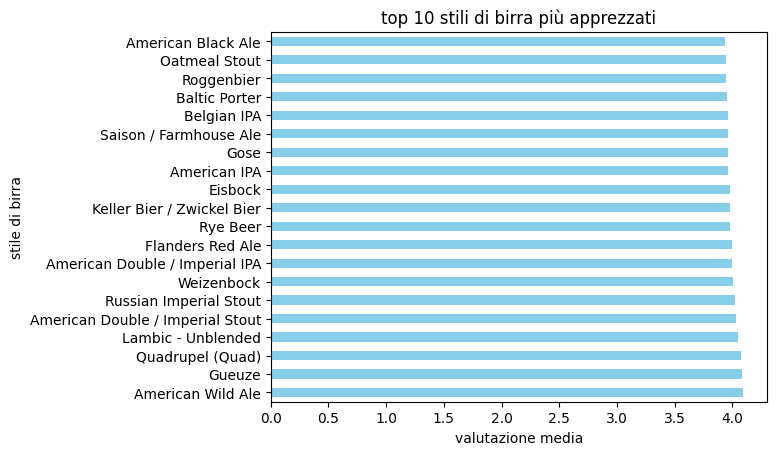

In [37]:
top_style.head(20).plot(kind='barh',color='skyblue')
plt.title('top 10 stili di birra più apprezzati')
plt.xlabel('valutazione media')
plt.ylabel('stile di birra')
plt.show()

In [38]:
all_style = avg_ratings_by_style.sort_values(ascending=False)
print(all_style)

beer_style
American Wild Ale                   4.093262
Gueuze                              4.086287
Quadrupel (Quad)                    4.071630
Lambic - Unblended                  4.048923
American Double / Imperial Stout    4.029820
                                      ...   
Happoshu                            2.914938
Euro Strong Lager                   2.862518
Light Lager                         2.698833
American Malt Liquor                2.678854
Low Alcohol Beer                    2.578268
Name: review_overall, Length: 104, dtype: float64


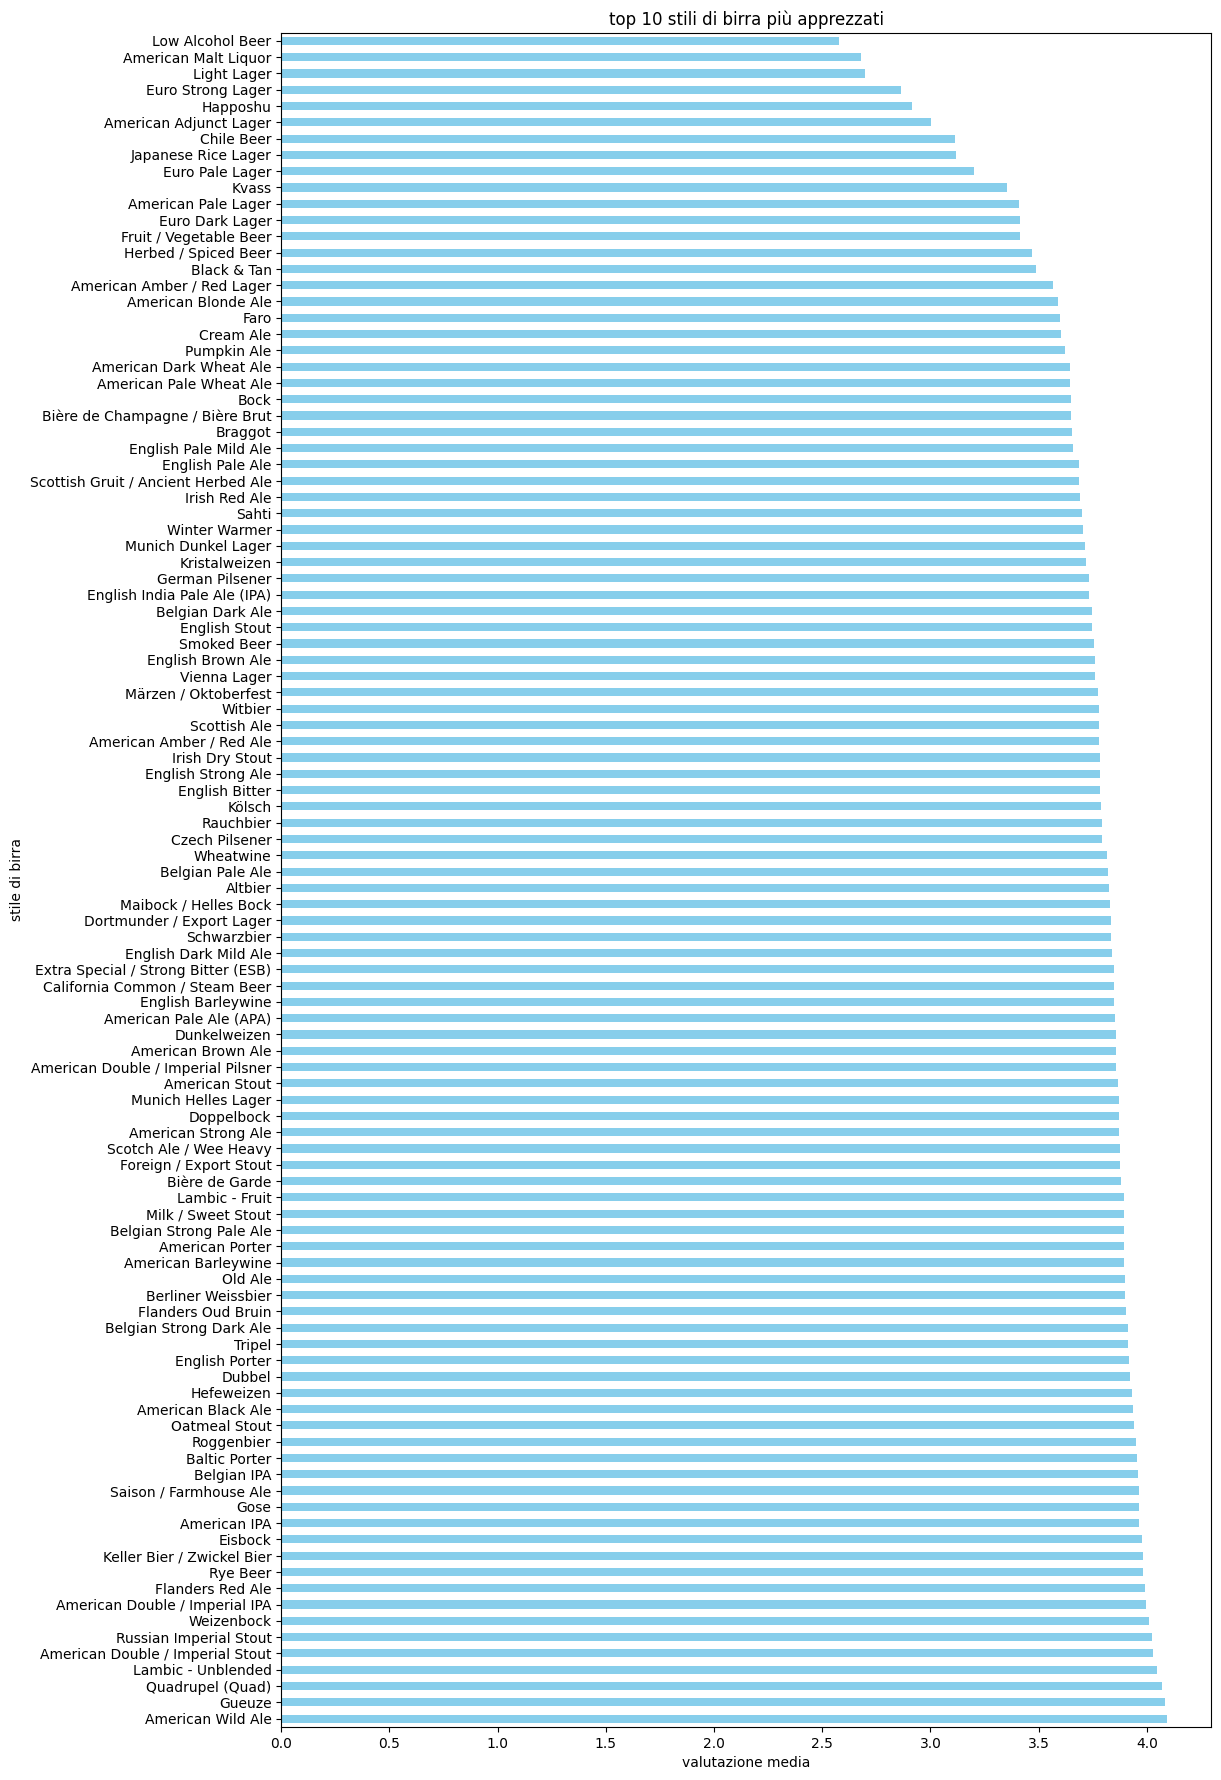

In [45]:
all_style.plot(kind='barh',figsize=(12,22), color='skyblue')
plt.title('top 10 stili di birra più apprezzati')
plt.xlabel('valutazione media')
plt.ylabel('stile di birra')
plt.show()

C:\Users\CRAIA-AREA EDUCATORI\AppData\Local\Temp\ipykernel_13212\2616615715.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='beer_style', y='review_overall', data=selected_styles, palette='coolwarm')


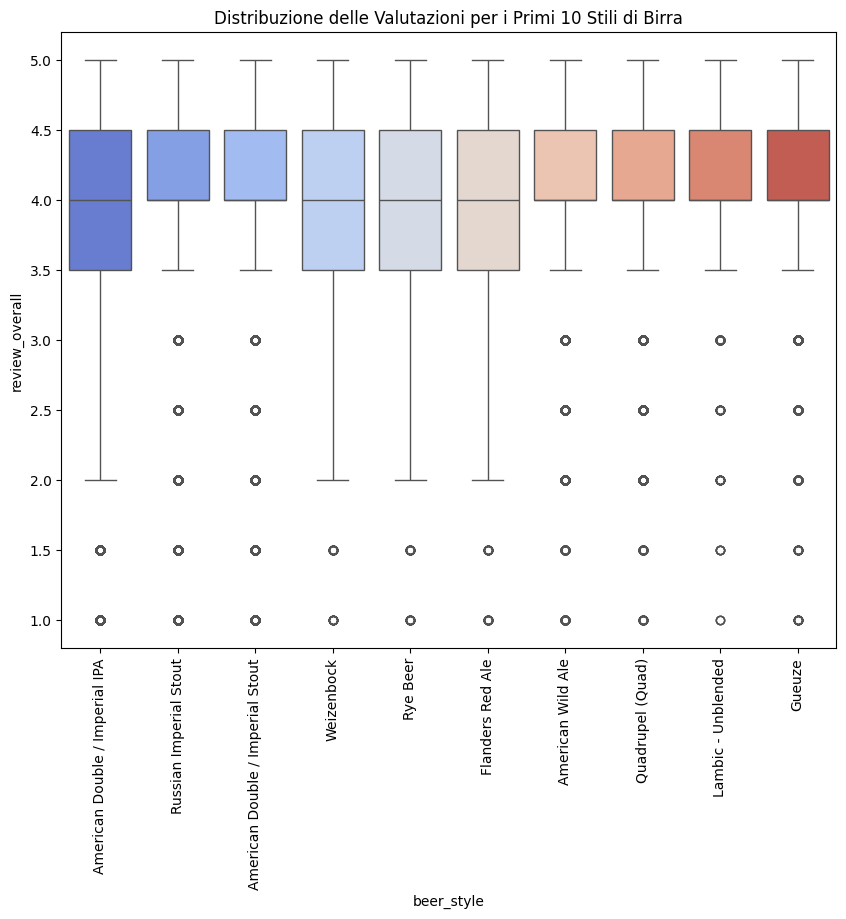

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleziona alcuni stili di birra e visualizza la distribuzione delle valutazioni
selected_styles = df[df['beer_style'].isin(top_style.index[:10])]  # I primi 10 stili

# Visualizza le distribuzioni con seaborn
plt.figure(figsize=(10, 8))
sns.boxplot(x='beer_style', y='review_overall', data=selected_styles, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Distribuzione delle Valutazioni per i Primi 10 Stili di Birra')
plt.show()


In [47]:
pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: C:\Users\CRAIA-AREA EDUCATORI\Documents\Università\interprete\Scripts\python.exe -m pip install --upgrade pip



  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/294.9 kB 653.6 kB/s eta 0:00:01
   -------------------- ------------------- 153.6/294.9 kB 1.0 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.5 MB/s eta 0:00:00


In [50]:
# Calcola la deviazione standard delle valutazioni per ogni stile
std_ratings_by_style = df.groupby('beer_style')['review_overall'].std()

# Ordina per gli stili con minore varianza
least_controversial_styles = std_ratings_by_style.sort_values(ascending=True)

print("Stili con la minore varianza nelle recensioni:")
print(least_controversial_styles.head(10))


Stili con la minore varianza nelle recensioni:
beer_style
Roggenbier                0.531308
American Black Ale        0.562235
Belgian IPA               0.572613
Baltic Porter             0.590558
Rye Beer                  0.593064
Weizenbock                0.598310
Scotch Ale / Wee Heavy    0.606551
American IPA              0.610760
Bière de Garde            0.616042
Saison / Farmhouse Ale    0.618310
Name: review_overall, dtype: float64


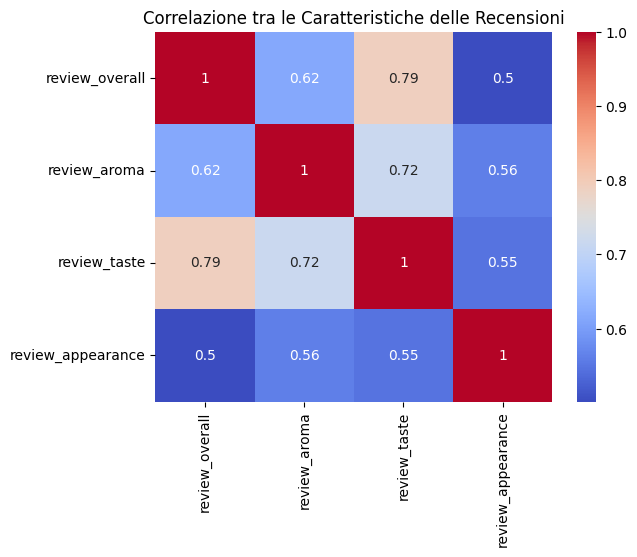

In [51]:
# Correlazione tra le diverse caratteristiche
correlation_matrix = df[['review_overall', 'review_aroma', 'review_taste', 'review_appearance']].corr()

# Visualizza la matrice di correlazione
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlazione tra le Caratteristiche delle Recensioni')
plt.show()
